# Description of The Problem

The very first challenge that new immigrants face when they first choose to move to Australia is which surburb that they should choose to settle down. Many factors should be incorporated to make a well-informed decision. They factors could includes:  
- Housing Affortability: How much is the average housing pricing in the surburb?
- School Accessibility: Are there any good public schools in the surburb?
- Food Accessibility: Are there any good restaurant with in the surburb?
- Coffee Accessibility: All Melbournian love coffee. This seems a must-have.
- Other Facilities: such as parks, movie theaters, etc.

In this project, we're aiming to identiify the most liveable community in Melbourne filtering by the criteria that we have just listed above. Australia is a big country. To perfectly address the above problem, we need quite a big integrated dataset sourcing from multiple channels. Our project is only aiming to prove the feasibility of such a task. Hence, our focus will be on the metropolitan area of Melbourne (Victoria state) ONLY. 

In [1]:
# To make my personal credential invisible to peers, I have stored my credential in a file named credential.py. 
# Here, I wouldn't import the credential. This is the exact credential that I just registered on Foursquare.com
from credential import API_KEY
import pandas as pd
import geopandas as gpd
import json
import requests
import matplotlib.pyplot as plt
import folium
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# This section of code is to test retrieving data through Foursquare API.

url_explore = 'https://api.foursquare.com/v2/venues/explore'
url_search = 'https://api.foursquare.com/v2/venues/search'

In [3]:
query = ['coffee', 'food']

In [29]:
params = dict(
  client_id=API_KEY['Client_ID'],
  client_secret=API_KEY['Client_Secret'],
  v=API_KEY['Version'],
  ll='-37.8183,144.9671',
  query=query[0],
  radius=20000,
  limit=5000
)

In [30]:
resp = requests.get(url=url_explore, params=params)
data = json.loads(resp.text)

In [31]:
data

{'meta': {'code': 200, 'requestId': '5bd1acf16a607146278a2073'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Melbourne',
  'headerFullLocation': 'Melbourne',
  'headerLocationGranularity': 'city',
  'query': 'coffee',
  'totalResults': 249,
  'suggestedBounds': {'ne': {'lat': -37.63829981999982,
    'lng': 145.19453465261336},
   'sw': {'lat': -37.99830018000018, 'lng': 144.73966534738662}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5153695ce4b02965ee259940',
       'name': 'Dukes Coffee Roasters',
       'location': {'address': '247 Flinders Ln.',
        'lat': -37.816763029794885,
        'lng': 144.96606395613023,
        'labeledLatLngs': [{'label': 'display',
      

In [32]:
# Dump the json dat into file
with open('coffee.json', 'w') as outfile:
    json.dump(data, outfile)

In [33]:
params = dict(
  client_id=API_KEY['Client_ID'],
  client_secret=API_KEY['Client_Secret'],
  v=API_KEY['Version'],
  ll='-37.8183,144.9671',
  query=query[1],
  radius=20000,
  limit=5000
)
resp = requests.get(url=url_explore, params=params)
data = json.loads(resp.text)
with open('food.json', 'w') as outfile:
    json.dump(data, outfile)

In [34]:
data

{'meta': {'code': 200, 'requestId': '5bd1ad30351e3d1695003550'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Melbourne',
  'headerFullLocation': 'Melbourne',
  'headerLocationGranularity': 'city',
  'query': 'food',
  'totalResults': 248,
  'suggestedBounds': {'ne': {'lat': -37.63829981999982,
    'lng': 145.19453465261336},
   'sw': {'lat': -37.99830018000018, 'lng': 144.73966534738662}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4dde183352b155583df9b62e',
       'name': 'Chin Chin',
       'location': {'address': '125 Flinders Ln',
        'crossStreet': 'at Higson Ln',
        'lat': -37.815450585998335,
        'lng': 144.97018899519054,
        'labeledLatLngs': [{'l

# Description of The Data

The address the problem that we pointed above. Multiple sources of data will be leveraged to help us find the answer. These data would includes:

- Foursquare Data: The data help us to explore coffee, food, and many other facilities and factors that can determine whether a community / suburb is liverable or not.
- Australia Statistical Boundry Data: The data provide Australian location data in the format of geometry (points or multi-polygon) which define the boundary of a given suburb.
- Real Estate Data: The data contains all the residential property transaction data in year 2017. 
- School Data: The data contains the information of all public shcools with geocoded address

You will see below a snipet of some of the data that we will use...

In [54]:
# Loading the relevant dataset 

housing = pd.read_csv('./data/mel_estate.csv')
school = pd.read_excel('./data/mel_school.xlsx', sheet_name=0)
# Note that geospatial data is in shapely format. So we are using geopandas to load and process the data.
s_boundry = gpd.read_file("./data/oz_suburb.zip/oz_suburn.shp")

In [161]:
housing.head()

,Agency,Price,DateSold,StreetAddress,Postcode,Locality,Latitude,Longitude,LandSize,LandSizeUnit,Bedrooms,Bathrooms,ParkingSpaces,PropertyType
0,First National Real Estate Mike Brown,9500000,2017-06-16,111 Mangans Rd,3140,Lilydale,-37.754930,145.371809,33285,m2,30,16,28,house
1,Marshall White,8150000,2017-05-23,7 Dunraven Avenue,3142,Toorak,-37.845278,145.014403,634,m2,4,3,3,house
2,Aqua Real Estate,7250000,2014-10-17,11 Williams Road,3930,Mount Eliza,-38.174377,145.091247,17184,m2,7,6,5,house
3,Lindellas Real Estate,6850000,2017-02-22,701 Station Street,3128,Box Hill,-37.817247,145.123739,662,m2,1,1,1,house
4,Lindellas Real Estate,6680000,2016-08-11,9-11 Ellingworth Parade,3128,Box Hill,-37.820382,145.124578,928,m2,2,2,1,house


In [162]:
school.head()

,Suburb,Post,School,Score,English Star,Maths Star,Enroll,Type,Pri/Sec?,Coed?,Religion,Other,Address,Telephone,Latitude,Longitude,2016,2015,2014,2013,2012,2011,2010,2009
0,Aberfeldie,3040,Lowther Hall Anglican Grammar School,96,5,4,788,Independent,Primary/Secondary Combined,Girls,Anglican,NaN,17 Leslie Road Essendon VIC,03 9337 5011,-37.7574,144.915,51.0,35.0,50.0,51.0,31.0,16.0,NaN,35.0
1,Carlton,3053,Carlton Primary School,74,3,2,97,Government,Primary,Coed,Non-Denominational,NaN,Neill Street Carlton VIC,03 9347 6022,-37.794,144.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carlton North,3054,Carlton North Primary School,93,5,4,253,Government,Primary,Coed,Non-Denominational,NaN,Lee Street Carlton North VIC,03 9347 4822,-37.7912,144.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Carlton North,3054,Princes Hill Primary School,86,4,4,449,Government,Primary,Coed,Non-Denominational,NaN,Pigdon Street Carlton North VIC,03 9389 5300,-37.7825,144.977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Flemington,3031,Kensington Primary School,92,5,4,469,Government,Primary,Coed,Non-Denominational,NaN,McCracken Street Kensington VIC,03 9376 6013,-37.7937,144.928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
s_boundry.head()

,gid,ssc_code16,ssc_name16,ste_code16,ste_name16,areasqkm16,geometry
0,35,SSC10035,Alison (Dungog - NSW),1,New South Wales,19.2707,"POLYGON ((151.764053147 -32.41493066699996, 15..."
1,32,SSC10032,Alfredtown,1,New South Wales,75.0792,POLYGON ((147.5114750120001 -35.18231799099993...
2,40,SSC10040,Allgomera,1,New South Wales,120.3883,POLYGON ((152.7509116040001 -30.81281309199994...
3,50,SSC10050,Amosfield,1,New South Wales,58.0043,POLYGON ((152.0540580930001 -28.63062838699994...
4,79,SSC10079,Argents Hill,1,New South Wales,76.2545,POLYGON ((152.6762974280001 -30.62597800299994...


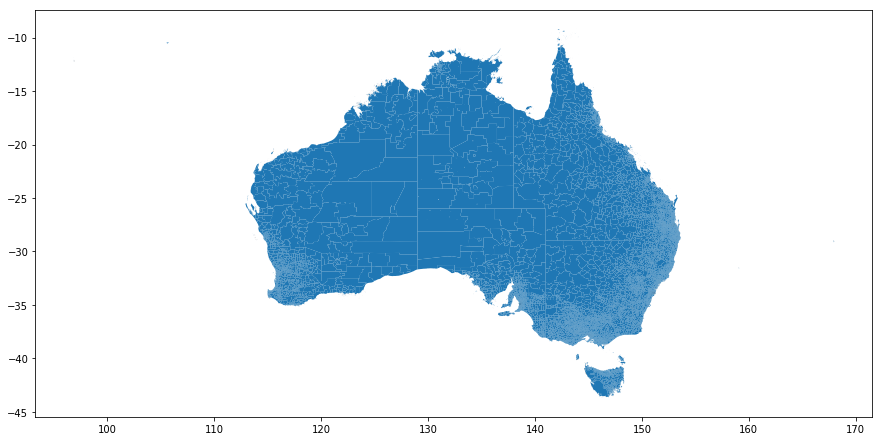

In [164]:
s_boundry.plot(figsize=(15,15))

In [165]:
s_boundry['ste_name16'].unique()

array(['New South Wales', 'Victoria', 'South Australia', 'Queensland',
       'Western Australia', 'Tasmania', 'Other Territories',
       'Northern Territory', 'Australian Capital Territory'], dtype=object)

### Data processing...
The data processing will contains multiple steps including
- Residential Property Transaction Data  
..* Clearning, filtering the data by suburb  
..* Extracting transaction data for 2017 only (The original data contains multiple multiple years data)  
..* Calculate parameters to measuring housing affordability e.g. median housing price per type
- Geospatial Boundry Data  
..* Extracting Melbourne suburb boundry data (The original data contains all suburb data across Australia)  
..* Calculating the centroid geocode e.g. latitude and longitude. This is to be used as reference coordination to retrieve data from Foursquare.
- Foursquare Data  
..* Retrieving foursquare data based on the centroid of each suburb.  
..* Converting json file to pandas dataframe.  
..* Intergrating data from above step and eliminate duplicates input.   
- School Data  
..* Cleaning data to keep school rank and geospatial data (latitude, longitude)
..* Converting dataframe to geodataframe to processing

<b>Let's process the property transaction data first</b>

In [166]:
housing.head()

,Agency,Price,DateSold,StreetAddress,Postcode,Locality,Latitude,Longitude,LandSize,LandSizeUnit,Bedrooms,Bathrooms,ParkingSpaces,PropertyType
0,First National Real Estate Mike Brown,9500000,2017-06-16,111 Mangans Rd,3140,Lilydale,-37.754930,145.371809,33285,m2,30,16,28,house
1,Marshall White,8150000,2017-05-23,7 Dunraven Avenue,3142,Toorak,-37.845278,145.014403,634,m2,4,3,3,house
2,Aqua Real Estate,7250000,2014-10-17,11 Williams Road,3930,Mount Eliza,-38.174377,145.091247,17184,m2,7,6,5,house
3,Lindellas Real Estate,6850000,2017-02-22,701 Station Street,3128,Box Hill,-37.817247,145.123739,662,m2,1,1,1,house
4,Lindellas Real Estate,6680000,2016-08-11,9-11 Ellingworth Parade,3128,Box Hill,-37.820382,145.124578,928,m2,2,2,1,house


In [167]:
housing.shape

(98377, 14)

In [168]:
housing['DateSold'] =  pd.to_datetime(housing['DateSold'])

In [169]:
housing['geometry'] = list(zip(housing['Longitude'], housing['Latitude']))

In [171]:
housing = housing[housing['DateSold'].dt.year == 2017]

In [173]:
# This operation is to get the housing price by property type and suburb (Locality) to calculate housing index
house_price = housing.groupby(['Locality', 'PropertyType']).describe()

In [175]:
house_price.head()

Price                                          \
                        count          mean            std        min   
Locality   PropertyType                                                 
Abbotsford apartment      2.0  7.062500e+05  330572.420205   472500.0   
           flat           1.0  1.755000e+06            NaN  1755000.0   
           house          8.0  1.285125e+06  276612.383516   911000.0   
Aberfeldie house         13.0  1.529885e+06  379146.747857   930000.0   
           townhouse      1.0  1.150000e+06            NaN  1150000.0   

                                                                    LandSize  \
                               25%        50%        75%        max    count   
Locality   PropertyType                                                        
Abbotsford apartment      589375.0   706250.0   823125.0   940000.0      2.0   
           flat          1755000.0  1755000.0  1755000.0  1755000.0      1.0   
           house         1168750.0  1237500.0  1347500.0  1830000.0      8.0   
Aberfeldie house         1225000.0  1600000.0  1860000.0  2050000.0     13.0   
           townhouse     1150000.0  1150000.0  1150000.0  1150000.0      1.0   

                                                                               \
                               mean         std    min     25%    50%     75%   
Locality   PropertyType                                                         
Abbotsford apartment      90.500000   31.819805   68.0   79.25   90.5  101.75   
           flat          357.000000         NaN  357.0  357.00  357.0  357.00   
           house         191.750000   79.081784  135.0  139.50  146.5  225.75   
Aberfeldie house         573.923077  160.630249  347.0  484.00  557.0  673.00   
           townhouse     224.000000         NaN  224.0  224.00  224.0  224.00   

                                
                           max  
Locality   PropertyType         
Abbotsford apartment     113.0  
           flat          357.0  
           house         329.0  
Aberfeldie house         858.0  
           townhouse     224.0

In [49]:
house_price.head()

Price  LandSize
Locality   PropertyType                     
Abbotsford apartment      706250.0      90.5
           flat          1755000.0     357.0
           house         1237500.0     146.5
Aberfeldie house         1600000.0     557.0
           townhouse     1150000.0     224.0

In [51]:
housing.Locality.nunique()

454

In [118]:
suburb = housing.drop_duplicates(subset=['Locality'])

In [57]:
from shapely.geometry import Point

In [129]:
geometry = [Point(xy) for xy in zip(suburb['Longitude'], suburb['Latitude'])]

In [134]:
crs = {'init': 'epsg:4326'}
suburb = gpd.GeoDataFrame(suburb, geometry=geometry, crs=crs)

In [147]:
suburb.head()

,Agency,Price,DateSold,StreetAddress,Postcode,Locality,Latitude,Longitude,LandSize,LandSizeUnit,Bedrooms,Bathrooms,ParkingSpaces,PropertyType,geometry
index_right,,,,,,,,,,,,,,,
0,First National Real Estate Mike Brown,9500000,2017-06-16,111 Mangans Rd,3140,Lilydale,-37.754930,145.371809,33285,m2,30,16,28,house,POINT (145.371809 -37.75493)
1,Marshall White,8150000,2017-05-23,7 Dunraven Avenue,3142,Toorak,-37.845278,145.014403,634,m2,4,3,3,house,POINT (145.014403 -37.845278)
2,Aqua Real Estate,7250000,2014-10-17,11 Williams Road,3930,Mount Eliza,-38.174377,145.091247,17184,m2,7,6,5,house,POINT (145.091247 -38.174377)
3,Lindellas Real Estate,6850000,2017-02-22,701 Station Street,3128,Box Hill,-37.817247,145.123739,662,m2,1,1,1,house,POINT (145.123739 -37.817247)
5,Barry Plant,6520000,2015-09-21,19-35 Graham Road,3084,Viewbank,-37.741765,145.084133,9370,m2,7,8,0,house,POINT (145.084133 -37.741765)


In [139]:
type(suburb)

geopandas.geodataframe.GeoDataFrame

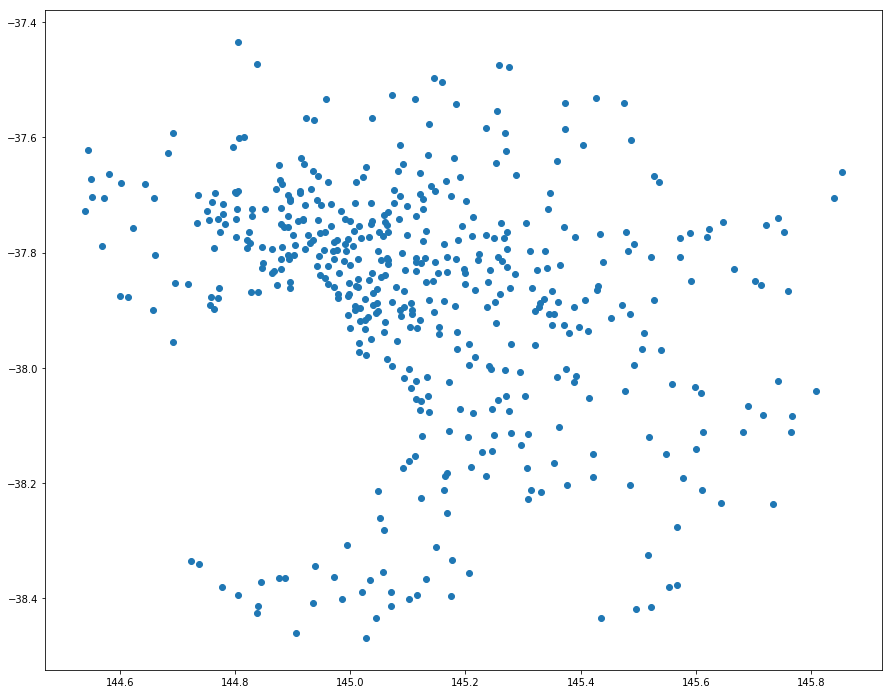

In [159]:
suburb.plot(figsize=(15,15))

<b>Now, let's focus on the ABS geospatial data</b>

In [141]:
s_boundry = s_boundry[s_boundry['ste_name16']=='Victoria']

In [142]:
# Because the suburb names in property transaction data are different from the ABS (Australian Bearua of Statistics)
# we used geopandas' spatial join function (whether the spatial points will fall into the spatial polygon) 
# to merge the data 
melbourne = gpd.sjoin(s_boundry, suburb, how='inner', op='intersects')

In [152]:
melbourne.head()

,gid,ssc_code16,ssc_name16,ste_code16,ste_name16,areasqkm16,geometry,index_right,Agency,Price,DateSold,StreetAddress,Postcode,Locality,Latitude,Longitude,LandSize,LandSizeUnit,Bedrooms,Bathrooms,ParkingSpaces,PropertyType
296,5299,SSC20773,Doreen,2,Victoria,32.2357,"POLYGON ((145.113752016 -37.58811400899998, 14...",1630,Barry Plant Doreen,2050000,2017-09-05,62-64 Laurimar Hill Drive,3754,Doreen,-37.576098,145.136744,3698,m2,6,3,3,house
349,5878,SSC21352,Kinglake West,2,Victoria,65.3005,POLYGON ((145.2504257910001 -37.42824635099998...,90479,Mason White McDougall,345000,2015-07-17,14 Marks Road,3757,Pheasant Creek,-37.477144,145.275214,4410,m2,3,1,2,house
349,5878,SSC21352,Kinglake West,2,Victoria,65.3005,POLYGON ((145.2504257910001 -37.42824635099998...,30267,Integrity Real Estate (Yarra Valley) Pty Ltd,760000,2017-01-27,51 Plover Way,3757,Kinglake West,-37.473802,145.258833,20272,m2,6,3,5,house
776,5735,SSC21209,Huntingdale (Vic.),2,Victoria,0.7978,"POLYGON ((145.104110285 -37.90790234499997, 14...",5377,Ray White,1452000,2017-04-29,22 Greville Street,3166,Huntingdale,-37.906334,145.108068,604,m2,4,2,3,house
819,6483,SSC21957,North Warrandyte,2,Victoria,8.7661,POLYGON ((145.1950009420001 -37.72731579799995...,4609,Ray White,1520000,2017-09-12,33 Bradleys Lane,3113,North Warrandyte,-37.738062,145.213390,5362,m2,4,3,2,house


In [154]:
melbourne.columns

Index(['gid', 'ssc_code16', 'ssc_name16', 'ste_code16', 'ste_name16',
       'areasqkm16', 'geometry', 'index_right', 'Agency', 'Price', 'DateSold',
       'StreetAddress', 'Postcode', 'Locality', 'Latitude', 'Longitude',
       'LandSize', 'LandSizeUnit', 'Bedrooms', 'Bathrooms', 'ParkingSpaces',
       'PropertyType'],
      dtype='object')

In [156]:
melbourne = melbourne[['gid', 'ssc_code16', 'ssc_name16', 'ste_code16', 'ste_name16',
       'areasqkm16', 'geometry', 'Locality']]

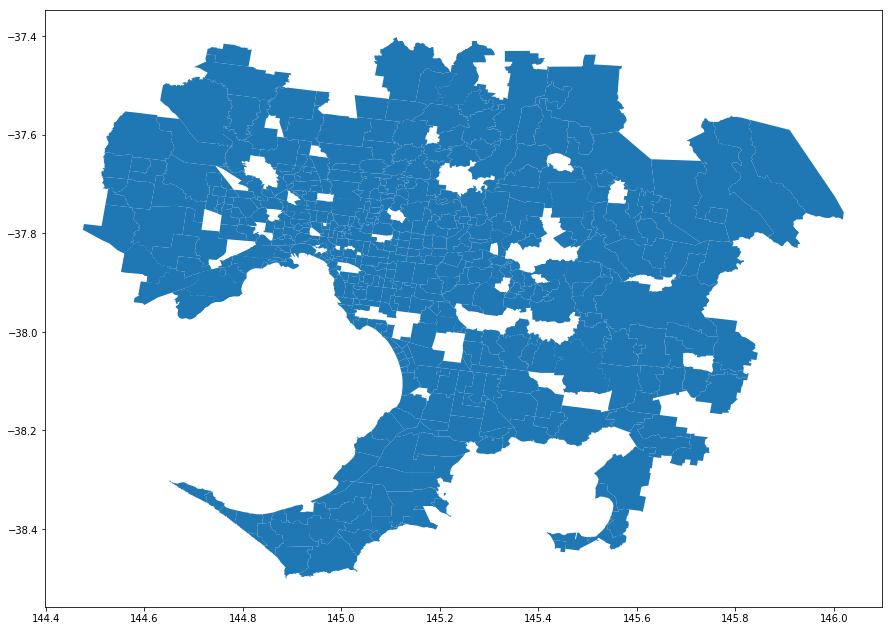

In [158]:
melbourne.plot(figsize=(15,15))

<b>Then we start to process the Foursquare data that we downloaded in previous section</b>

In [40]:
from pandas.io.json import json_normalize

In [49]:
# Load the coffee data from previous json dump from Foursquare

with open('coffee.json') as json_data:
    c = json.load(json_data)

In [45]:
coffee = json_normalize(c['response']['groups'][0]['items'])

In [47]:
coffee.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-5153695ce4b02965ee259940-0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",5153695ce4b02965ee259940,247 Flinders Ln.,AU,Melbourne,Australia,NaN,193,"[247 Flinders Ln., Melbourne VIC 3000, Australia]","[{'label': 'display', 'lat': -37.8167630297948...",-37.816763,144.966064,NaN,3000,VIC,Dukes Coffee Roasters,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b058748f964a520cf8822e3-1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",4b058748f964a520cf8822e3,359 Little Bourke St,AU,Melbourne,Australia,NaN,694,"[359 Little Bourke St, Melbourne VIC 3000, Aus...","[{'label': 'display', 'lat': -37.8134453152653...",-37.813445,144.962137,NaN,3000,VIC,Brother Baba Budan,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4ee91d794901e2d61a51221b-2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",4ee91d794901e2d61a51221b,493-495 Little Bourke St,AU,Melbourne,Australia,at Little William St,872,[493-495 Little Bourke St (at Little William S...,"[{'label': 'display', 'lat': -37.8145977053813...",-37.814598,144.958350,NaN,3000,VIC,Patricia Coffee Brewers,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-548e129b498e3012587f3e5c-3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",548e129b498e3012587f3e5c,20 Drewery Ln,AU,Melbourne,Australia,Lonsdale St,867,"[20 Drewery Ln (Lonsdale St), Melbourne VIC 30...","[{'label': 'display', 'lat': -37.8108599377085...",-37.810860,144.964180,NaN,3000,VIC,Little Rogue Coffee,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-55e6828a498eb23090956e29-4,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",55e6828a498eb23090956e29,33 Guildford Ln,AU,Melbourne CBD,Australia,NaN,1005,"[33 Guildford Ln, Melbourne CBD VIC 3000, Aust...","[{'label': 'display', 'lat': -37.8113411762781...",-37.811341,144.959816,NaN,3000,VIC,Brick Lane,0,[],NaN


In [50]:
# Load the food data from previous dump from Foursquare

with open('food.json') as json_data:
    d = json.load(json_data)

In [51]:
food = json_normalize(d['response']['groups'][0]['items'])

In [52]:
food.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4dde183352b155583df9b62e-0,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",4dde183352b155583df9b62e,125 Flinders Ln,AU,Melbourne,Australia,at Higson Ln,417,"[125 Flinders Ln (at Higson Ln), Melbourne VIC...","[{'label': 'display', 'lat': -37.8154505859983...",-37.815451,144.970189,Melbourne CBD,3000,VIC,Chin Chin,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b1c842df964a520140824e3-1,"[{'id': '52e81612bcbc57f1066b79f2', 'name': 'C...",4b1c842df964a520140824e3,"Shop 2, 241 Flinders Ln",AU,Melbourne,Australia,at Scott Alley,183,"[Shop 2, 241 Flinders Ln (at Scott Alley), Mel...","[{'label': 'display', 'lat': -37.8167790703066...",-37.816779,144.966295,NaN,3000,VIC,Roule Galette,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4be735706af1ef3bb0831b96-2,"[{'id': '4bf58dd8d48988d169941735', 'name': 'A...",4be735706af1ef3bb0831b96,187 Flinders Ln,AU,Melbourne,Australia,btwn Russell St & Swanston St,269,[187 Flinders Ln (btwn Russell St & Swanston S...,"[{'label': 'display', 'lat': -37.8160753058551...",-37.816075,144.968314,NaN,3000,VIC,ezard,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-5368ad36498eb3c4cc6e52a8-3,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",5368ad36498eb3c4cc6e52a8,180 Flinders Ln,AU,Melbourne,Australia,Watson Pl,279,"[180 Flinders Ln (Watson Pl), Melbourne VIC 30...","[{'label': 'display', 'lat': -37.8160025562122...",-37.816003,144.968388,NaN,3000,VIC,Supernormal,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-54631f6e498ed0dde017e53c-4,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",54631f6e498ed0dde017e53c,361 Little Bourke St,AU,Melbourne,Australia,NaN,696,"[361 Little Bourke St, Melbourne VIC 3000, Aus...","[{'label': 'display', 'lat': -37.8135265165961...",-37.813527,144.961978,Melbourne CBD,3000,VIC,Tipo 00,0,[],NaN


<b>Finally, it's time to process the school data</b>

In [55]:
school.head()

,Suburb,Post,School,Score,English Star,Maths Star,Enroll,Type,Pri/Sec?,Coed?,Religion,Other,Address,Telephone,Latitude,Longitude,2016,2015,2014,2013,2012,2011,2010,2009
0,Aberfeldie,3040,Lowther Hall Anglican Grammar School,96,5,4,788,Independent,Primary/Secondary Combined,Girls,Anglican,NaN,17 Leslie Road Essendon VIC,03 9337 5011,-37.7574,144.915,51.0,35.0,50.0,51.0,31.0,16.0,NaN,35.0
1,Carlton,3053,Carlton Primary School,74,3,2,97,Government,Primary,Coed,Non-Denominational,NaN,Neill Street Carlton VIC,03 9347 6022,-37.794,144.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carlton North,3054,Carlton North Primary School,93,5,4,253,Government,Primary,Coed,Non-Denominational,NaN,Lee Street Carlton North VIC,03 9347 4822,-37.7912,144.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Carlton North,3054,Princes Hill Primary School,86,4,4,449,Government,Primary,Coed,Non-Denominational,NaN,Pigdon Street Carlton North VIC,03 9389 5300,-37.7825,144.977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Flemington,3031,Kensington Primary School,92,5,4,469,Government,Primary,Coed,Non-Denominational,NaN,McCracken Street Kensington VIC,03 9376 6013,-37.7937,144.928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
school = school[['School', 'Score', 'Latitude', 'Longitude']]
school['Latitude'] = pd.to_numeric(school['Latitude'], errors='coerce')
school['Longitude'] = pd.to_numeric(school['Longitude'], errors='coerce')

In [62]:
geometry = [Point(xy) for xy in zip(school['Longitude'], school['Latitude'])]

In [63]:
crs = {'init': 'epsg:4326'}
school = gpd.GeoDataFrame(school, geometry=geometry, crs=crs)

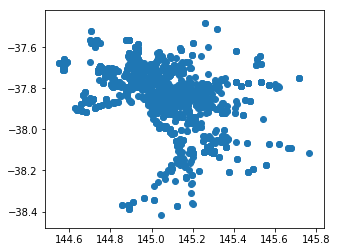

In [64]:
school.plot()

# The analysis section